In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, choice, sample
from matplotlib.colors import ListedColormap

In [3]:
def paint_area(grid, p1, p2, val):
    x1, y1 = p1
    x2, y2 = p2
    for i in range(x1, x2):
        for j in range(y1, y2):
            grid[i,j] = val
    return grid

def is_wall_near(grid, pos):
    x, y = pos
    if x+1 <= grid.shape[0]-1:
        if grid[x+1, y]==1:
            return True
    if x-1 >= 0:
        if grid[x-1, y]==1:
            return True
    if y+1 <= grid.shape[1]-1:
        if grid[x, y+1]==1:
            return True
    if y-1 >= 0:
        if grid[x, y-1]==1:
            return True
    return False

def filter_positions_by_doors(positions, door_list, h):
    banned_pos = []
    for p in positions:
        for d in door_list:
            if p == d[h]:
                banned_pos.append(p)
    positions = [v for v in positions if v not in banned_pos]
    return positions

def halve(maze, p0, p1, horizontal=False, padding=0, door_pos=[(0,0)]):
    x_min, y_min = p0
    x_max, y_max = p1
    if horizontal:
        available_positions = list(range(y_min+padding, y_max-padding))
        available_positions = filter_positions_by_doors(available_positions, door_pos, horizontal)
        if not available_positions:
            return None
        cut_pos = choice(available_positions)
        walls = [(i, cut_pos) for i in range(x_min, x_max)]
        h1 = [(x_min, y_min), (x_max, cut_pos)]
        h2 = [(x_min, cut_pos+1), (x_max, y_max)]
        next_cut_is_h = False
    else:
        available_positions = list(range(x_min+padding, x_max-padding))
        available_positions = filter_positions_by_doors(available_positions, door_pos, horizontal)
        if not available_positions:
            return None
        cut_pos = choice(available_positions)
        walls = [(cut_pos, j) for j in range(y_min, y_max)]
        h1 = [(x_min, y_min), (cut_pos, y_max)]
        h2 = [(cut_pos+1, y_min), (x_max, y_max)]
        next_cut_is_h = True
    options = [w for w in walls if not is_wall_near(maze, w)]
    dp = [(0,0)]
    if not options:
        return None
    for x, y in walls:
        maze[x,y] = 1
    hx, hy = choice(options)
    maze[hx, hy] = 0
    dp2 = (hx, hy)
    dp.append(dp2)
    return maze, h1, h2, next_cut_is_h, dp


#### Random wall and door

Painted area (green and yellow) represents that the function "halve()" correctly outputs the two halves areas generated by the split, so each can be inputted again on another call of halve(), following this process fractally*

or at least until there's space left to do so

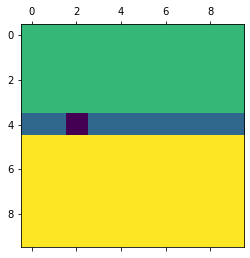

In [7]:
maze = np.zeros((10,10))
maze, h1, h2, n0, dp = halve(maze, (0,0), (10,10), horizontal=1 , padding=0)
maze = paint_area(maze, h1[0], h1[1], 2)
maze = paint_area(maze, h2[0], h2[1], 3)
plt.matshow(maze.T)


#### Random Maze with depth 2

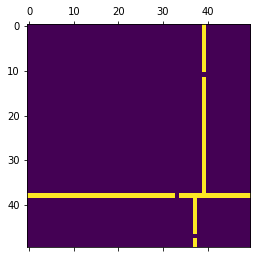

In [8]:
maze = np.zeros((50,50))

maze, h1, h2, n0, dp1 = halve(maze, (0,0), (50,50), 1, padding=3)
# first half
maze, h3, h4, n1, dp2 = halve(maze, h1[0], h1[1], n0, padding=1, door_pos=dp1)
# second half
maze, h5, h6, n2, dp3 = halve(maze, h2[0], h2[1], n0, padding=0, door_pos=dp1)

plt.matshow(maze.T)


#### Generating Recursively

In [11]:
def generate_maze(maze, p0, p1, h, p, dp):
    out = halve(maze, p0, p1, h, 1, dp)
    if not out:
        return None
    maze, h1, h2, nch, dp2 = out
    dp3 = dp + dp2
    dp3 = list(set(dp3))
    # for h1:
    generate_maze(maze, h1[0], h1[1], nch, 0, dp3)
    # for h2:
    generate_maze(maze, h2[0], h2[1], nch, 0, dp3)

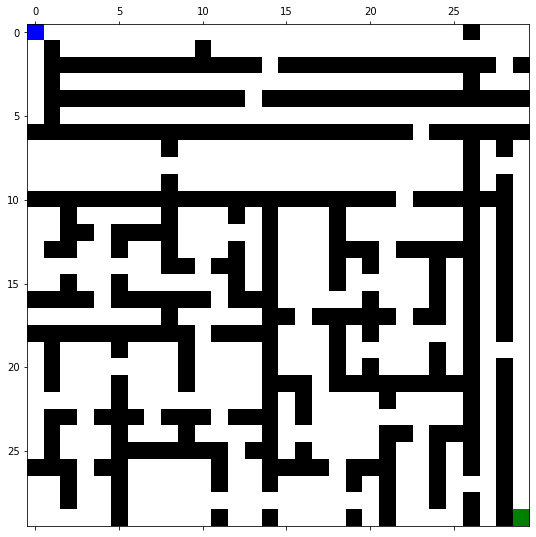

In [13]:
x_size = 30
y_size = 30
maze = np.zeros((x_size, y_size))
generate_maze(maze, (0,0), (x_size, y_size), 1, 1, [(0,0)])
maze[0,0] = 2
maze[x_size-1, y_size-1] = 3

cmap = ListedColormap(['w','k','r','b','g'])
plt.figure(figsize=(9,9))
plt.matshow(maze.T, fignum=1, cmap=cmap)

#### Generating Maze in only some parts of the grid

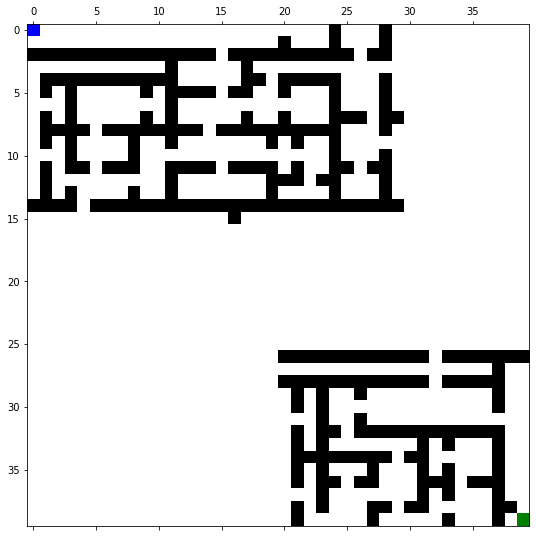

In [248]:
x_size = 40
y_size = 40
maze = np.zeros((x_size, y_size))
generate_maze(maze, (0,0), (30,17), 1, 1, [(0,0)])
generate_maze(maze, (20,25), (40, 40), 1, 1, [(0,0)])

maze[0,0] = 2 # start
maze[x_size-1, y_size-1] = 3 # end 
# any corner is acessible from any other corner tho

cmap = ListedColormap(['w','k','r','b','g'])
plt.figure(figsize=(9,9))
plt.matshow(maze.T, fignum=1, cmap=cmap)

#### Rectangular Maze

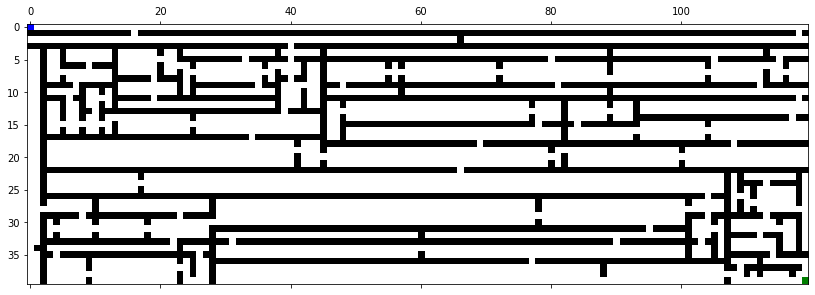

In [17]:
x_size = 120
y_size = 40
maze = np.zeros((x_size, y_size))
generate_maze(maze, (0,0), (x_size, y_size), 1, 1, [(0,0)])
maze[0,0] = 2
maze[x_size-1, y_size-1] = 3

cmap = ListedColormap(['w','k','r','b','g'])
plt.figure(figsize=(14,9))
plt.matshow(maze.T, fignum=1, cmap=cmap)

# Soon: 
# * solver
# * tiled maze with pygame